In [1]:
from google.colab import drive
drive.mount('/content/dirve')

Drive already mounted at /content/dirve; to attempt to forcibly remount, call drive.mount("/content/dirve", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm

all_fonts_I_can_use = fm.findSystemFonts(fontpaths=None,fontext='ttf')
all_fonts_I_can_use

['/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/Liberati

In [4]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf'
font = fm.FontProperties(fname=fontpath,size = 9)
fm._rebuild()

%config inlineBackend.figure_format = 'retina'

font_name = fm.FontProperties(fname=fontpath).get_name()
plt.rc('font',family=font_name)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


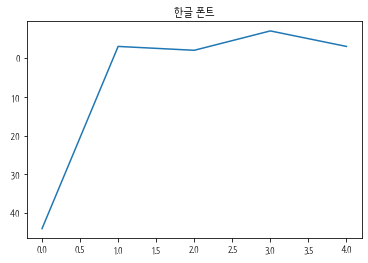

In [5]:
plt.title("한글 폰트")
plt.plot([-44,3,2,7,3])

In [6]:
df = pd.read_csv('/content/dirve/MyDrive/빅데이터 분석/빅분2/data/소상공인시장진흥공단_상가(상권)정보_서울_202112.csv')
df.shape

(315294, 39)

In [7]:
pd.options.display.max_columns = 39

In [8]:
df.head(10)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,건강보조식품 소매업,11,서울특별시,11560,영등포구,1156053500,영등포동,1156010600,영등포동5가,1156010600100410001,1,대지,41,1.0,서울특별시 영등포구 영등포동5가 41-1,115604154799,서울특별시 영등포구 영중로14길,11,17.0,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,악기 소매업,11,서울특별시,11200,성동구,1120079000,용답동,1120012200,용답동,1120012200101420011,1,대지,142,11.0,서울특별시 성동구 용답동 142-11,112004109480,서울특별시 성동구 용답5길,2,NaN,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,시계 및 귀금속 소매업,11,서울특별시,11110,종로구,1111061500,종로1.2.3.4가동,1111015200,봉익동,1111015200100430001,1,대지,43,1.0,서울특별시 종로구 봉익동 43-1,111104100163,서울특별시 종로구 서순라길,17,10.0,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,일반 교과 학원,11,서울특별시,11710,송파구,1171056100,방이1동,1171011100,방이동,1171011100101970003,1,대지,197,3.0,서울특별시 송파구 방이동 197-3,117104169448,서울특별시 송파구 위례성대로12길,31,NaN,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165062100,방배4동,1165010100,방배동,1165010100108540018,1,대지,854,18.0,서울특별시 서초구 방배동 854-18,116504163117,서울특별시 서초구 동광로18길,82,NaN,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375
5,17174119,쓰리에프,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11590,동작구,1159063000,사당2동,1159010700,사당동,1159010700101390072,1,대지,139,72.0,서울특별시 동작구 사당동 139-72,115904157119,서울특별시 동작구 동작대로27가길,12,NaN,1159010700101390073009536,NaN,서울특별시 동작구 동작대로27가길 12,156816,7008.0,NaN,NaN,NaN,126.980952,37.487105
6,17174096,채움,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11110,종로구,1111061500,종로1.2.3.4가동,1111012400,수송동,1111012400100580000,1,대지,58,NaN,서울특별시 종로구 수송동 58,111103100006,서울특별시 종로구 삼봉로,81,NaN,1111012400100580000017956,두산위브파빌리온,서울특별시 종로구 삼봉로 81,110858,3150.0,NaN,NaN,NaN,126.981794,37.572387
7,17174040,다향,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11650,서초구,1165053000,서초3동,1165010800,서초동,1165010800114850003,1,대지,1485,3.0,서울특별시 서초구 서초동 1485-3,116503121021,서울특별시 서초구 효령로,230,NaN,1165010800114850004022127,NaN,서울특별시 서초구 효령로 230,137869,6709.0,NaN,1,NaN,127.009382,37.483436
8,25530299,고향생막걸리,NaN,Q,음식,Q09,유흥주점,Q09A04,민속주점,I56219,기타 주점업,11,서울특별시,11680,강남구,1168054500,압구정동,1168010700,신사동,1168010700106150001,1,대지,615,1.0,서울특별시 강남구 신사동 615-1,116803122007,서울특별시 강남구 압구정로,216,NaN,1168010700106150001009703,코끼리상가,서울특별시 강남구 압구정로 216,135894,6023.0,NaN,1,NaN,127.031012,37.528073
9,21938782,무비디자인,NaN,R,학문/교육,R02,학원-창업취업취미,R02A12,학원-디자인,P85659,기타 기술 및 직업훈련학원,11,서울특별시,11440,마포구,1144060000,대흥동,1144011000,노고산동,1144011000101070017,1,대지,107,17.0,서울특별시 마포구 노고산동 107-17,114403005016,서울특별시 마포구 백범로,8,NaN,1144011000101070017018922,우정마샹스오피스텔,서울특별시 마포구 백범로 8,121807,4100.0,NaN,NaN,NaN,126.936717,37.553996


In [9]:
df.tail(10)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
315284,17958684,부기굿즈,NaN,D,소매,D03,종합소매점,D03A03,잡화점,G47190,그외 기타 종합 소매업,11,서울특별시,11680,강남구,1168070000,세곡동,1168011200,자곡동,1168011200106870000,1,대지,687,NaN,서울특별시 강남구 자곡동 687,116804166880,서울특별시 강남구 밤고개로21길,25,NaN,1168011200103610000000001,래미안포레,서울특별시 강남구 밤고개로21길 25,135190,6370.0,305,NaN,NaN,127.110556,37.475005
315285,17946708,한국중소기업경영비지니스센터,NaN,F,생활서비스,F13,기타서비스업,F13A01,사업경영상담,M71531,경영컨설팅업,11,서울특별시,11650,서초구,1165052000,서초2동,1165010800,서초동,1165010800113600034,1,대지,1360,34.0,서울특별시 서초구 서초동 1360-34,116504163018,서울특별시 서초구 강남대로39길,6,7.0,1165010800113600034022819,NaN,서울특별시 서초구 강남대로39길 6-7,137863,6730.0,NaN,NaN,NaN,127.032351,37.486600
315286,17960939,인스트라코딩,NaN,R,학문/교육,R06,학원-컴퓨터,R06A01,컴퓨터학원,P85691,컴퓨터 학원,11,서울특별시,11200,성동구,1120053500,왕십리도선동,1120010200,하왕십리동,1120010200110700000,1,대지,1070,NaN,서울특별시 성동구 하왕십리동 1070,112003005011,서울특별시 성동구 왕십리로,410,NaN,1120010200108420000000001,센트라스,서울특별시 성동구 왕십리로 410,133020,4701.0,121,NaN,NaN,127.028354,37.565526
315287,17948230,대운사,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,셔츠 및 기타 의복 소매업,11,서울특별시,11140,중구,1114060500,을지로동,1114015300,방산동,1114015300100190001,1,대지,19,1.0,서울특별시 중구 방산동 19-1,111403100021,서울특별시 중구 청계천로,246,NaN,1114015300100190001013750,평화시장,서울특별시 중구 청계천로 246,100811,4563.0,NaN,2,NaN,127.004702,37.569357
315288,17945150,메이크에이헤어,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,두발미용업,11,서울특별시,11710,송파구,1171065000,잠실본동,1171010100,잠실동,1171010100101830012,1,대지,183,12.0,서울특별시 송파구 잠실동 183-12,117104169204,서울특별시 송파구 백제고분로7길,41,NaN,1171010100101830002000001,NS파인트리,서울특별시 송파구 백제고분로7길 41,138861,5558.0,NaN,4,NaN,127.083559,37.510985
315289,17915026,사라헤어하우스,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,두발미용업,11,서울특별시,11620,관악구,1162061500,중앙동,1162010100,봉천동,1162010100108610011,1,대지,861,11.0,서울특별시 관악구 봉천동 861-11,116203120001,서울특별시 관악구 관악로,185,NaN,1162010100108610014026971,NaN,서울특별시 관악구 관악로 185,151811,8758.0,NaN,3,NaN,126.952644,37.481784
315290,17917525,김현진153필라테스,NaN,N,관광/여가/오락,N05,요가/단전/마사지,N05A01,요가/단식,S96129,기타 미용관련 서비스업,11,서울특별시,11740,강동구,1174062000,천호3동,1174010900,천호동,1174010900100510007,1,대지,51,7.0,서울특별시 강동구 천호동 51-7,117402000006,서울특별시 강동구 양재대로,1517,NaN,1174010900100510007009699,남해빌딩,서울특별시 강동구 양재대로 1517,134862,5316.0,NaN,1,NaN,127.140855,37.541259
315291,17913544,26도헤어마곡나루역점,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,두발미용업,11,서울특별시,11500,강서구,1150060300,가양1동,1150010500,마곡동,1150010500107590001,1,대지,759,1.0,서울특별시 강서구 마곡동 759-1,115003155047,서울특별시 강서구 마곡서로,152,NaN,1150010500107590001000001,두산더랜드타워,서울특별시 강서구 마곡서로 152,157805,7788.0,306,NaN,NaN,126.825623,37.567747
315292,17958597,명품케터링,NaN,Q,음식,Q13,음식배달서비스,Q13A03,음식출장조달,I56131,출장 음식 서비스업,11,서울특별시,11305,강북구,1130557500,삼각산동,1130510100,미아동,1130510100113570000,1,대지,1357,NaN,서울특별시 강북구 미아동 1357,113054124223,서울특별시 강북구 삼양로19길,113,NaN,1130510100113570000035071,삼각산아이원아파트,서울특별시 강북구 삼양로19길 113,142718,1198.0,120,NaN,NaN,127.017829,37.617041
315293,17938681,페어즈오브슈즈,NaN,D,소매,D06,가방/신발/액세서리,D06A01,신발소매,G47420,신발 소매업,11,서울특별시,11560,영등포구,1156053500,영등포동,1156010900,영등포동8가,1156010900100450005,1,대지,45,5.0,서울특별시 영등포구 영등포동8가 45-5,115603118024,서울특별시 영등포구 영중로,116,NaN,1156010900100450005031978,NaN,서울특별시 영등포구 영중로 116,150030,7229.0,NaN,NaN,NaN,126.905938,37.526557


In [10]:
df.index

RangeIndex(start=0, stop=315294, step=1)

In [11]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315294 entries, 0 to 315293
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     315294 non-null  int64  
 1   상호명        315293 non-null  object 
 2   지점명        55561 non-null   object 
 3   상권업종대분류코드  315294 non-null  object 
 4   상권업종대분류명   315294 non-null  object 
 5   상권업종중분류코드  315294 non-null  object 
 6   상권업종중분류명   315294 non-null  object 
 7   상권업종소분류코드  315294 non-null  object 
 8   상권업종소분류명   315294 non-null  object 
 9   표준산업분류코드   296187 non-null  object 
 10  표준산업분류명    296187 non-null  object 
 11  시도코드       315294 non-null  int64  
 12  시도명        315294 non-null  object 
 13  시군구코드      315294 non-null  int64  
 14  시군구명       315294 non-null  object 
 15  행정동코드      315294 non-null  int64  
 16  행정동명       315289 non-null  object 
 17  법정동코드      315294 non-null  int64  
 18  법정동명       315294 non-null  object 
 19  지번코드       315294 non-n

In [13]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드           int64
시도명           object
시군구코드          int64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드          int64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호          int64
신우편번호        float64
동정보           object
층정보           object
호정보          float64
경도           float64
위도           float64
dtype: object

In [14]:
n = df.isnull().sum()

In [15]:
n

상가업소번호            0
상호명               1
지점명          259733
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      19107
표준산업분류명       19107
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              5
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         64425
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        274463
건물관리번호            0
건물명          161936
도로명주소             0
구우편번호             0
신우편번호            50
동정보          284893
층정보          124702
호정보          315294
경도                0
위도                0
dtype: int64

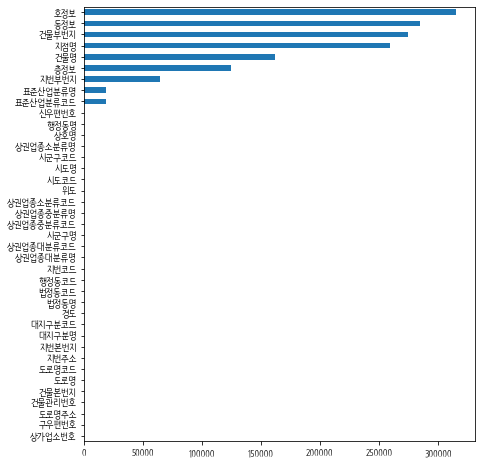

In [16]:
n.sort_values().plot.barh(figsize = (7,8))

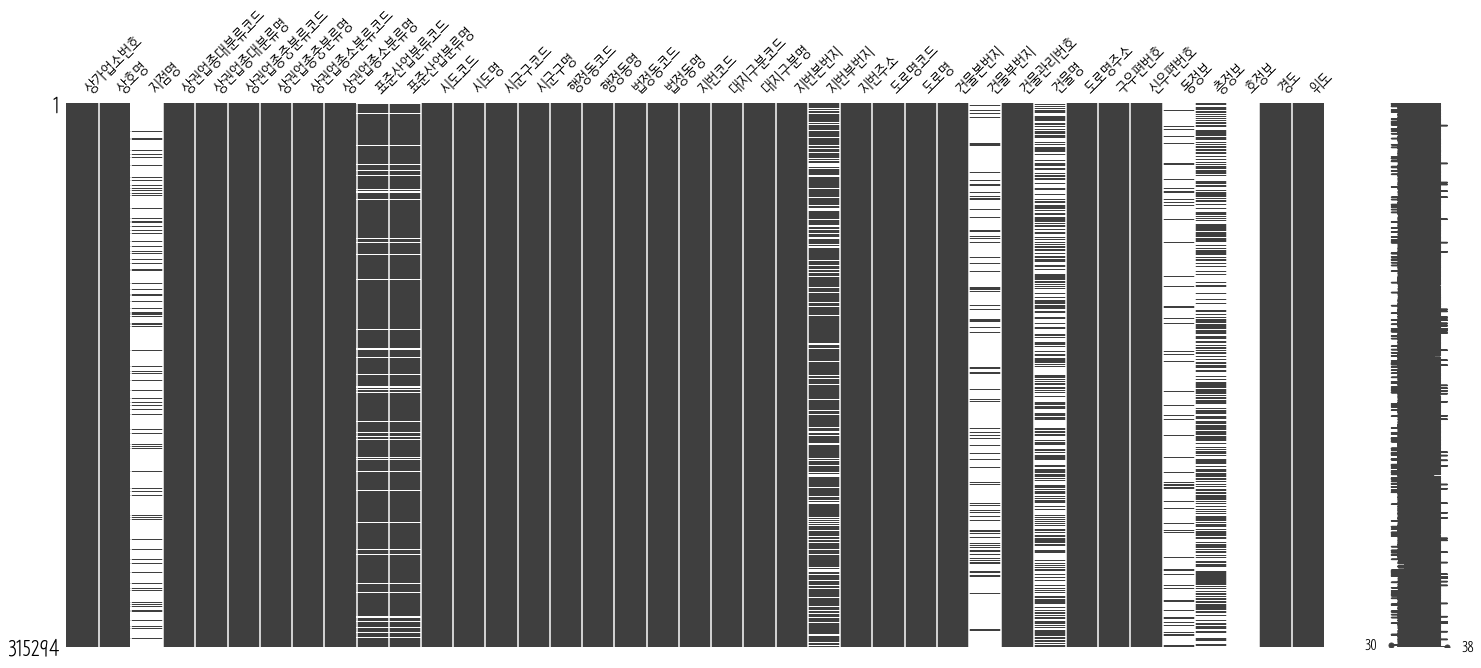

In [17]:
import missingno as msno

msno.matrix(df)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


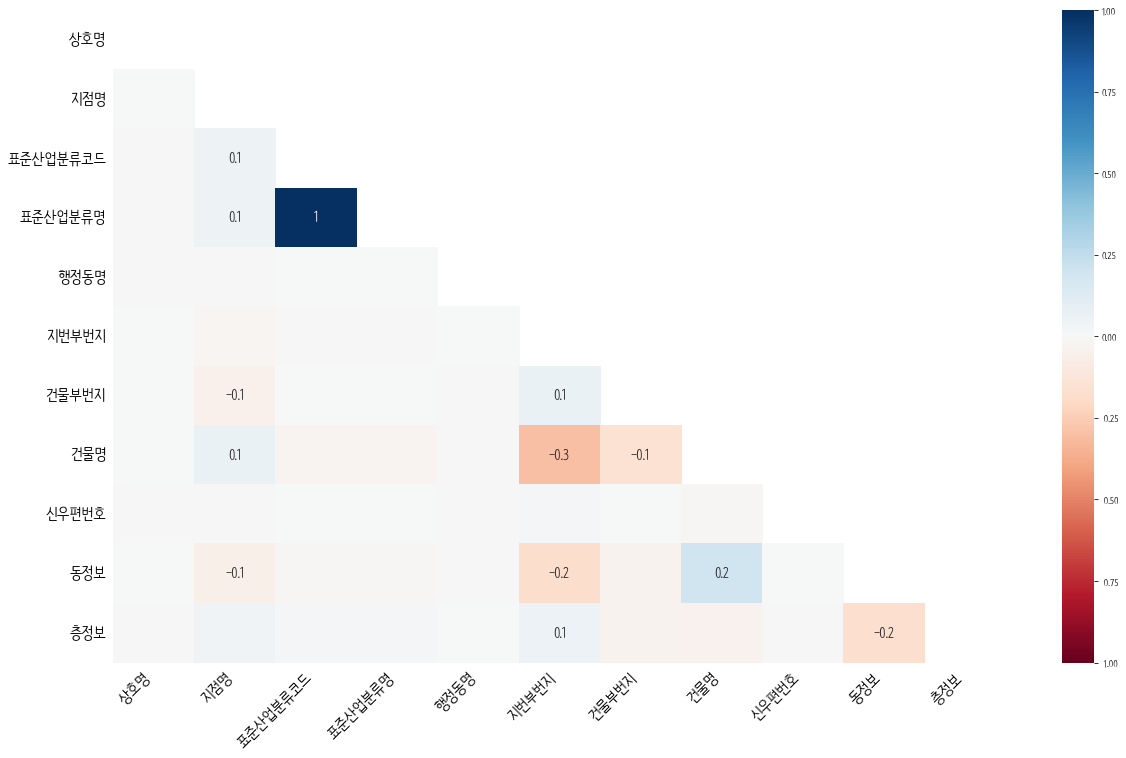

In [18]:
msno.heatmap(df)

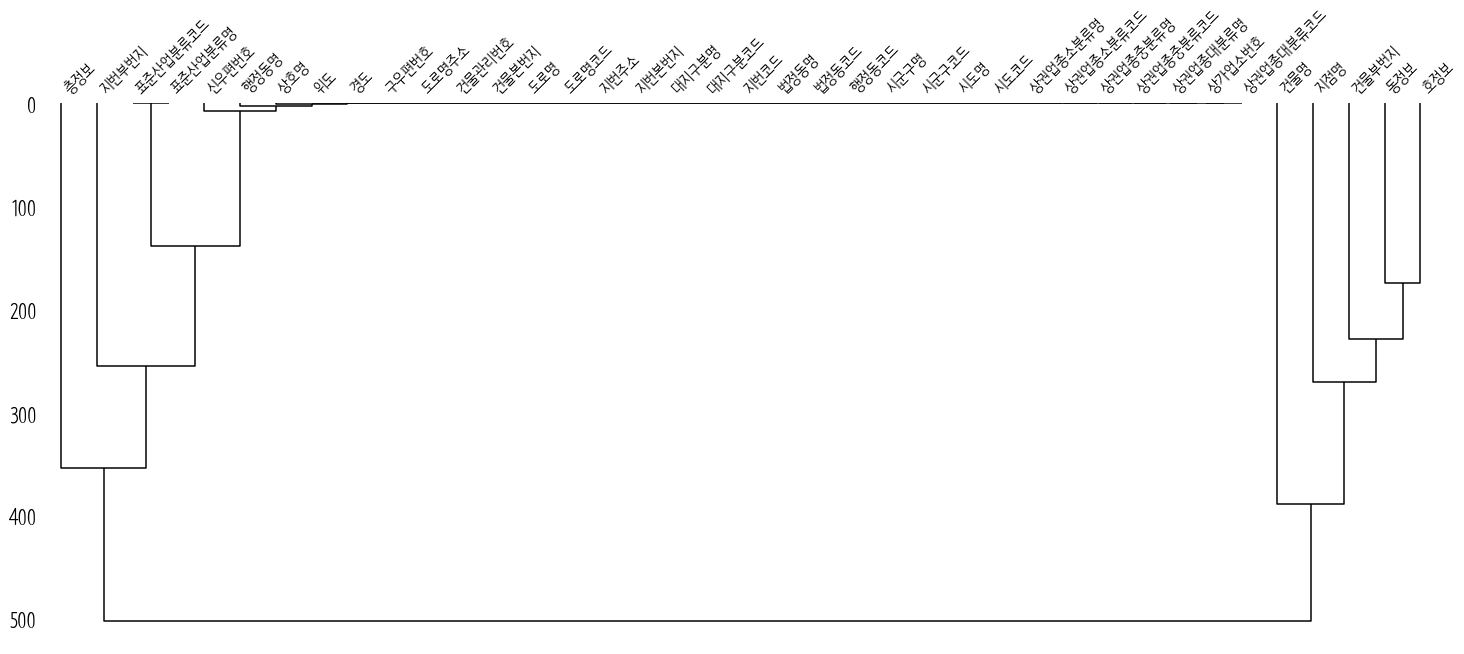

In [19]:
msno.dendrogram(df)

In [20]:
not_use = n.sort_values(ascending = False).head(9)
not_use_col = not_use.index
not_use_col

Index(['호정보', '동정보', '건물부번지', '지점명', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [21]:
print(df.shape)

df = df.drop(not_use_col,axis = 1)
print(df.shape)

(315294, 39)
(315294, 30)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315294 entries, 0 to 315293
Data columns (total 30 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     315294 non-null  int64  
 1   상호명        315293 non-null  object 
 2   상권업종대분류코드  315294 non-null  object 
 3   상권업종대분류명   315294 non-null  object 
 4   상권업종중분류코드  315294 non-null  object 
 5   상권업종중분류명   315294 non-null  object 
 6   상권업종소분류코드  315294 non-null  object 
 7   상권업종소분류명   315294 non-null  object 
 8   시도코드       315294 non-null  int64  
 9   시도명        315294 non-null  object 
 10  시군구코드      315294 non-null  int64  
 11  시군구명       315294 non-null  object 
 12  행정동코드      315294 non-null  int64  
 13  행정동명       315289 non-null  object 
 14  법정동코드      315294 non-null  int64  
 15  법정동명       315294 non-null  object 
 16  지번코드       315294 non-null  int64  
 17  대지구분코드     315294 non-null  int64  
 18  대지구분명      315294 non-null  object 
 19  지번본번지      315294 non-n

In [23]:
cols = df.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [24]:
col_code = cols[cols.str.contains('코드|번호')]
col_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [25]:
print(df.shape)

df = df.drop(col_code,axis=1)

print(df.shape)

(315294, 30)
(315294, 16)


In [26]:
df['상권업종대분류명'].unique()

array(['소매', '학문/교육', '음식', '부동산', '생활서비스', '관광/여가/오락', '숙박', '스포츠'],
      dtype=object)

In [27]:
df[df['상권업종대분류명']=='학문/교육']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
3,김선희꼼꼼국어교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,송파구,방이1동,방이동,대지,197,서울특별시 송파구 방이동 197-3,서울특별시 송파구 위례성대로12길,31,서울특별시 송파구 위례성대로12길 31,127.121520,37.510967
9,무비디자인,학문/교육,학원-창업취업취미,학원-디자인,서울특별시,마포구,대흥동,노고산동,대지,107,서울특별시 마포구 노고산동 107-17,서울특별시 마포구 백범로,8,서울특별시 마포구 백범로 8,126.936717,37.553996
21,힐리빙텔,학문/교육,도서관/독서실,독서실,서울특별시,서대문구,신촌동,대현동,대지,37,서울특별시 서대문구 대현동 37-69,서울특별시 서대문구 이화여대5길,28,서울특별시 서대문구 이화여대5길 28,126.944057,37.558414
22,김샘수학교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,중구,신당5동,신당동,대지,851,서울특별시 중구 신당동 851,서울특별시 중구 퇴계로90길,74,서울특별시 중구 퇴계로90길 74,127.020965,37.560996
46,노바수학학원,학문/교육,학원-보습교습입시,학원-입시,서울특별시,강남구,일원2동,개포동,대지,12,서울특별시 강남구 개포동 12-4,서울특별시 강남구 개포로,615,서울특별시 강남구 개포로 615,127.075573,37.492649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315206,웰빙텔,학문/교육,도서관/독서실,고시원,서울특별시,서대문구,남가좌2동,남가좌동,대지,339,서울특별시 서대문구 남가좌동 339-34,서울특별시 서대문구 증가로,116,서울특별시 서대문구 증가로 116,126.924774,37.577098
315215,꿈꾸다홈스쿨,학문/교육,학원기타,학원-기타,서울특별시,관악구,인헌동,봉천동,대지,180,서울특별시 관악구 봉천동 180-333,서울특별시 관악구 인헌16길,17,서울특별시 관악구 인헌16길 17-9,126.967408,37.469642
315253,제임교육,학문/교육,유아교육,유아교육기관기타,서울특별시,종로구,사직동,신문로2가,대지,1,서울특별시 종로구 신문로2가 1-322,서울특별시 종로구 경희궁3가길,13,서울특별시 종로구 경희궁3가길 13-15,126.967617,37.572714
315270,개인과외교습,학문/교육,학원기타,학원-기타,서울특별시,용산구,이촌2동,이촌동,대지,203,서울특별시 용산구 이촌동 203-27,서울특별시 용산구 이촌로18길,11,서울특별시 용산구 이촌로18길 11-23,126.955831,37.525765


In [28]:
df[df['시도명'] == '서울특별시']

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,제중건강원,소매,건강/미용식품,건강원,서울특별시,영등포구,영등포동,영등포동5가,대지,41,서울특별시 영등포구 영등포동5가 41-1,서울특별시 영등포구 영중로14길,11,서울특별시 영등포구 영중로14길 11-17,126.907168,37.520613
1,민속악기사,소매,취미/오락관련소매,악기판매,서울특별시,성동구,용답동,용답동,대지,142,서울특별시 성동구 용답동 142-11,서울특별시 성동구 용답5길,2,서울특별시 성동구 용답5길 2,127.049018,37.566857
2,태평양진주,소매,시계/귀금속소매,시계/귀금속,서울특별시,종로구,종로1.2.3.4가동,봉익동,대지,43,서울특별시 종로구 봉익동 43-1,서울특별시 종로구 서순라길,17,서울특별시 종로구 서순라길 17-10,126.993530,37.571848
3,김선희꼼꼼국어교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,송파구,방이1동,방이동,대지,197,서울특별시 송파구 방이동 197-3,서울특별시 송파구 위례성대로12길,31,서울특별시 송파구 위례성대로12길 31,127.121520,37.510967
4,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,대지,854,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길,82,서울특별시 서초구 동광로18길 82,126.991394,37.488375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315289,사라헤어하우스,생활서비스,이/미용/건강,여성미용실,서울특별시,관악구,중앙동,봉천동,대지,861,서울특별시 관악구 봉천동 861-11,서울특별시 관악구 관악로,185,서울특별시 관악구 관악로 185,126.952644,37.481784
315290,김현진153필라테스,관광/여가/오락,요가/단전/마사지,요가/단식,서울특별시,강동구,천호3동,천호동,대지,51,서울특별시 강동구 천호동 51-7,서울특별시 강동구 양재대로,1517,서울특별시 강동구 양재대로 1517,127.140855,37.541259
315291,26도헤어마곡나루역점,생활서비스,이/미용/건강,여성미용실,서울특별시,강서구,가양1동,마곡동,대지,759,서울특별시 강서구 마곡동 759-1,서울특별시 강서구 마곡서로,152,서울특별시 강서구 마곡서로 152,126.825623,37.567747
315292,명품케터링,음식,음식배달서비스,음식출장조달,서울특별시,강북구,삼각산동,미아동,대지,1357,서울특별시 강북구 미아동 1357,서울특별시 강북구 삼양로19길,113,서울특별시 강북구 삼양로19길 113,127.017829,37.617041


In [29]:
df_academy = df[(df['시도명'] == '서울특별시') & (df['상권업종대분류명'] == '학문/교육')]
df_academy.dtypes

상호명          object
상권업종대분류명     object
상권업종중분류명     object
상권업종소분류명     object
시도명          object
시군구명         object
행정동명         object
법정동명         object
대지구분명        object
지번본번지         int64
지번주소         object
도로명          object
건물본번지         int64
도로명주소        object
경도          float64
위도          float64
dtype: object

In [30]:
df_academy['지번본번지']=df_academy['지번본번지'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_academy.dtypes

상호명          object
상권업종대분류명     object
상권업종중분류명     object
상권업종소분류명     object
시도명          object
시군구명         object
행정동명         object
법정동명         object
대지구분명        object
지번본번지        object
지번주소         object
도로명          object
건물본번지         int64
도로명주소        object
경도          float64
위도          float64
dtype: object

In [32]:
df_academy = df[(df['시도명'] == '서울특별시') & (df['상권업종대분류명'] == '학문/교육')].copy()

In [33]:
df_academy['지번본번지']=df_academy['지번본번지'].astype(str)
df_academy.dtypes

상호명          object
상권업종대분류명     object
상권업종중분류명     object
상권업종소분류명     object
시도명          object
시군구명         object
행정동명         object
법정동명         object
대지구분명        object
지번본번지        object
지번주소         object
도로명          object
건물본번지         int64
도로명주소        object
경도          float64
위도          float64
dtype: object

In [34]:
df_academy['지번본번지']=df_academy['지번본번지'].astype(int)
df_academy.dtypes

상호명          object
상권업종대분류명     object
상권업종중분류명     object
상권업종소분류명     object
시도명          object
시군구명         object
행정동명         object
법정동명         object
대지구분명        object
지번본번지         int64
지번주소         object
도로명          object
건물본번지         int64
도로명주소        object
경도          float64
위도          float64
dtype: object

In [35]:
df_academy['상호명'].value_counts()

학원              315
공부방              91
카페               68
뮤엠영어             36
해법수학             31
               ... 
수학하는아이수학전문학원      1
바퀴달린그림책교습소        1
봄빛가득한어린이집         1
삼성숲어린이집           1
인스트라코딩            1
Name: 상호명, Length: 19472, dtype: int64

In [36]:
df_academy['시군구명'].value_counts()

강남구     2193
송파구     1501
서초구     1473
양천구     1423
노원구     1298
강동구     1172
강서구     1153
성북구      984
은평구      966
광진구      963
구로구      899
마포구      872
동작구      851
관악구      843
중랑구      718
도봉구      696
동대문구     691
영등포구     681
서대문구     628
성동구      599
금천구      498
종로구      473
강북구      473
용산구      401
중구       316
Name: 시군구명, dtype: int64

In [37]:
academy_count = df_academy['상권업종소분류명'].value_counts().head(30)

In [38]:
academy_count

학원-입시          4483
어린이집           2746
학원-외국어/어학      2711
학원(종합)         2584
학원-기타          2162
피아노/바이올린/기타    2116
서예/서화/미술       1181
독서실             971
고시원             782
태권도장            498
학습지보급           254
학원-스포츠/재즈댄스     205
학원-무용           198
학원-어린이영어        187
컴퓨터학원           166
유아교육기관기타        134
학원-공예           100
합기도장             79
학원-주산암산부기속셈      70
검도도장             69
실내놀이터-유아         67
학원-미용            66
학원-요리            58
놀이방              57
학원-간호조무사         55
운동/코치학교          50
학원-배우/탤런트        49
학원-국악            36
학원-사교춤           34
시험정보안내           34
Name: 상권업종소분류명, dtype: int64

In [39]:
academy_count>1000

학원-입시           True
어린이집            True
학원-외국어/어학       True
학원(종합)          True
학원-기타           True
피아노/바이올린/기타     True
서예/서화/미술        True
독서실            False
고시원            False
태권도장           False
학습지보급          False
학원-스포츠/재즈댄스    False
학원-무용          False
학원-어린이영어       False
컴퓨터학원          False
유아교육기관기타       False
학원-공예          False
합기도장           False
학원-주산암산부기속셈    False
검도도장           False
실내놀이터-유아       False
학원-미용          False
학원-요리          False
놀이방            False
학원-간호조무사       False
운동/코치학교        False
학원-배우/탤런트      False
학원-국악          False
학원-사교춤         False
시험정보안내         False
Name: 상권업종소분류명, dtype: bool

In [40]:
academy_count_1000 = academy_count[academy_count>1000]

In [41]:
academy_count_1000

학원-입시          4483
어린이집           2746
학원-외국어/어학      2711
학원(종합)         2584
학원-기타          2162
피아노/바이올린/기타    2116
서예/서화/미술       1181
Name: 상권업종소분류명, dtype: int64

In [42]:
df_academy['상권업종소분류명'].unique()

array(['학원-입시', '학원-디자인', '독서실', '레크레이션지도/상담', '학원(종합)', '어린이집',
       '운동/코치학교', '피아노/바이올린/기타', '학원-외국어/어학', '학원-스포츠/재즈댄스', '서예/서화/미술',
       '학원-기타', '고시원', '학원-웅변', '학습지보급', '학원-편입', '태권도장', '학원-심리변론',
       '놀이방', '학원-어린이영어', '예절지도', '학원-꽃꽃이', '검도도장', '학원-무용', '유아교육기관기타',
       '학원-주산암산부기속셈', '학원-바둑', '학원-마술', '학원/국가고시', '학원-도배', '학원-경영',
       '합기도장', '컴퓨터학원', '학원-배우/탤런트', '학원-국가고시', '블럭놀이방', '학원-속독',
       '실내놀이터-유아', '학원-만화영화', '학원-공예', '유도장', '학원-사교춤', '학원-미용',
       '학원-광고디자인', '학원-펜글씨/한문', '학원-자동차운전', '학원-서당', '학원-국악', '학원-제과기술',
       '학원-요리', '학원-가요', '학원-피부미용', '학원-한복기술', '이동도서관운영', '학원-공인중개사',
       '학원-분장', '학원-경리', '시험정보안내', '학원-기계/금형기술', '학원-속기', '학원-보석감정',
       '학원-역학', '학원-간호조무사', '학원-지점토', '비행훈련원', '운전연수전문', '학원-자동차정비',
       '학원-복장', '학원-전기기술', '학원-칵테일', '학원-TV기술', '학원-중장비', '학원-스튜디어스',
       '학원-건축토목기술', '학원-에어로빅', '학원-네일아트', '학원-사진', '학원-목공예', '학원-용접기술',
       '학원-미싱자수', '학원-관광통역', '학원-실내운전', '학원-환경기사', '학원-양재', '학원-검정고시',
       '학원-애견미용', '학원-텔렉스/

In [43]:
academy_group = df_academy.groupby(['시군구명', '상권업종소분류명'])['상호명'].count()

In [44]:
academy_group

시군구명  상권업종소분류명   
강남구   검도도장             7
      고시원             87
      놀이방              1
      독서실             83
      서예/서화/미술       129
                    ... 
중랑구   학원-입시          124
      학원-제과기술          1
      학원-주산암산부기속셈      6
      학원-펜글씨/한문        1
      합기도장             2
Name: 상호명, Length: 1051, dtype: int64

In [45]:
academy_group.loc['강남구','검도도장']

7

In [46]:
academy_group = df_academy.groupby(['상권업종소분류명', '시군구명'])['상호명'].count()

In [47]:
academy_group.loc['검도도장']

시군구명
강남구     7
강동구     4
강서구     4
관악구     3
광진구     2
구로구     2
금천구     1
노원구     4
도봉구     1
동대문구    3
동작구     4
마포구     1
서대문구    2
서초구     9
성동구     3
성북구     2
송파구     5
양천구     3
영등포구    4
용산구     1
은평구     2
중랑구     2
Name: 상호명, dtype: int64

In [48]:
t= academy_group.reset_index()
t


,상권업종소분류명,시군구명,상호명
0,검도도장,강남구,7
1,검도도장,강동구,4
2,검도도장,강서구,4
3,검도도장,관악구,3
4,검도도장,광진구,2
...,...,...,...
1046,합기도장,영등포구,2
1047,합기도장,용산구,2
1048,합기도장,은평구,3
1049,합기도장,중구,1


In [49]:
t = t.rename(columns = {'상호명' : '상호수'}) 

In [50]:
t

,상권업종소분류명,시군구명,상호수
0,검도도장,강남구,7
1,검도도장,강동구,4
2,검도도장,강서구,4
3,검도도장,관악구,3
4,검도도장,광진구,2
...,...,...,...
1046,합기도장,영등포구,2
1047,합기도장,용산구,2
1048,합기도장,은평구,3
1049,합기도장,중구,1


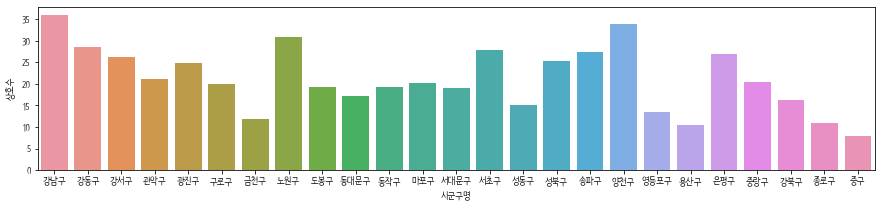

In [51]:
plt.figure(figsize = (15,3))
sns.barplot(data = t, x = '시군구명',y = '상호수',ci = None)

In [52]:
 academy_count_1000.index

Index(['학원-입시', '어린이집', '학원-외국어/어학', '학원(종합)', '학원-기타', '피아노/바이올린/기타',
       '서예/서화/미술'],
      dtype='object')

In [53]:
print(df_academy.shape)

df_academy_selected = df_academy[df_academy['상권업종소분류명'].isin(academy_count_1000.index)].copy()
df_academy_selected.shape

(22765, 16)


(17983, 16)

In [54]:
df_academy_selected['상권업종소분류명'].value_counts()

학원-입시          4483
어린이집           2746
학원-외국어/어학      2711
학원(종합)         2584
학원-기타          2162
피아노/바이올린/기타    2116
서예/서화/미술       1181
Name: 상권업종소분류명, dtype: int64

In [55]:
df_academy_selected['시군구명'].value_counts()

강남구     1716
양천구     1225
송파구     1165
서초구     1151
노원구     1100
강동구      940
강서구      921
은평구      812
성북구      797
광진구      743
구로구      735
마포구      689
동작구      598
중랑구      592
도봉구      586
관악구      585
동대문구     523
서대문구     497
영등포구     495
성동구      479
금천구      399
강북구      379
종로구      345
용산구      305
중구       206
Name: 시군구명, dtype: int64

In [56]:
df_academy_selected

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
3,김선희꼼꼼국어교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,송파구,방이1동,방이동,대지,197,서울특별시 송파구 방이동 197-3,서울특별시 송파구 위례성대로12길,31,서울특별시 송파구 위례성대로12길 31,127.121520,37.510967
22,김샘수학교습소,학문/교육,학원-보습교습입시,학원-입시,서울특별시,중구,신당5동,신당동,대지,851,서울특별시 중구 신당동 851,서울특별시 중구 퇴계로90길,74,서울특별시 중구 퇴계로90길 74,127.020965,37.560996
46,노바수학학원,학문/교육,학원-보습교습입시,학원-입시,서울특별시,강남구,일원2동,개포동,대지,12,서울특별시 강남구 개포동 12-4,서울특별시 강남구 개포로,615,서울특별시 강남구 개포로 615,127.075573,37.492649
84,오렌지음악교습소,학문/교육,학원기타,학원(종합),서울특별시,송파구,거여2동,거여동,대지,295,서울특별시 송파구 거여동 295,서울특별시 송파구 양산로2길,38,서울특별시 송파구 양산로2길 38,127.146210,37.488396
88,구립큰솔어린이집,학문/교육,유아교육,어린이집,서울특별시,양천구,신정3동,신정동,대지,1322,서울특별시 양천구 신정동 1322,서울특별시 양천구 신정이펜2로,55,서울특별시 양천구 신정이펜2로 55,126.830817,37.514998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315179,공부방,학문/교육,학원기타,학원-기타,서울특별시,강동구,암사1동,암사동,대지,482,서울특별시 강동구 암사동 482,서울특별시 강동구 올림픽로98가길,62,서울특별시 강동구 올림픽로98가길 62,127.133020,37.551401
315185,제네시스수학교습소,학문/교육,학원기타,학원-기타,서울특별시,서초구,반포3동,잠원동,대지,75,서울특별시 서초구 잠원동 75-19,서울특별시 서초구 신반포로,177,서울특별시 서초구 신반포로 177,127.003394,37.506092
315194,대차게그림,학문/교육,학원-음악미술무용,서예/서화/미술,서울특별시,마포구,용강동,도화동,대지,51,서울특별시 마포구 도화동 51-1,서울특별시 마포구 마포대로,49,서울특별시 마포구 마포대로 49,126.946873,37.540859
315215,꿈꾸다홈스쿨,학문/교육,학원기타,학원-기타,서울특별시,관악구,인헌동,봉천동,대지,180,서울특별시 관악구 봉천동 180-333,서울특별시 관악구 인헌16길,17,서울특별시 관악구 인헌16길 17-9,126.967408,37.469642


In [57]:
df_academy_selected[(df_academy_selected['법정동명']=='불광동') & (df_academy_selected['상권업종소분류명'] == '어린이집')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 7028 to 259586
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       17 non-null     object 
 1   상권업종대분류명  17 non-null     object 
 2   상권업종중분류명  17 non-null     object 
 3   상권업종소분류명  17 non-null     object 
 4   시도명       17 non-null     object 
 5   시군구명      17 non-null     object 
 6   행정동명      17 non-null     object 
 7   법정동명      17 non-null     object 
 8   대지구분명     17 non-null     object 
 9   지번본번지     17 non-null     int64  
 10  지번주소      17 non-null     object 
 11  도로명       17 non-null     object 
 12  건물본번지     17 non-null     int64  
 13  도로명주소     17 non-null     object 
 14  경도        17 non-null     float64
 15  위도        17 non-null     float64
dtypes: float64(2), int64(2), object(12)
memory usage: 2.3+ KB


In [58]:
df_academy_selected[(df_academy_selected['법정동명']=='신사동') & (df_academy_selected['상권업종소분류명'] == '어린이집')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1500 to 303632
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       23 non-null     object 
 1   상권업종대분류명  23 non-null     object 
 2   상권업종중분류명  23 non-null     object 
 3   상권업종소분류명  23 non-null     object 
 4   시도명       23 non-null     object 
 5   시군구명      23 non-null     object 
 6   행정동명      23 non-null     object 
 7   법정동명      23 non-null     object 
 8   대지구분명     23 non-null     object 
 9   지번본번지     23 non-null     int64  
 10  지번주소      23 non-null     object 
 11  도로명       23 non-null     object 
 12  건물본번지     23 non-null     int64  
 13  도로명주소     23 non-null     object 
 14  경도        23 non-null     float64
 15  위도        23 non-null     float64
dtypes: float64(2), int64(2), object(12)
memory usage: 3.1+ KB


In [59]:
df_academy_selected.loc[df_academy_selected['법정동명']=='불광동','상권업종소분류명'].value_counts()

학원-입시          23
어린이집           17
학원(종합)         16
학원-외국어/어학      12
피아노/바이올린/기타    11
학원-기타           6
서예/서화/미술        6
Name: 상권업종소분류명, dtype: int64

In [72]:
g = df_academy_selected.groupby(['상권업종소분류명','시군구명'])['상호명'].count()
g.sort_values(ascending = False).sort_index(level = 0, ascending= True, sort_remaining=False)

상권업종소분류명  시군구명
서예/서화/미술  강남구     129
          송파구      87
          서초구      70
          강동구      69
          마포구      66
                 ... 
학원-입시     강북구      85
          금천구      77
          종로구      56
          용산구      47
          중구       46
Name: 상호명, Length: 175, dtype: int64

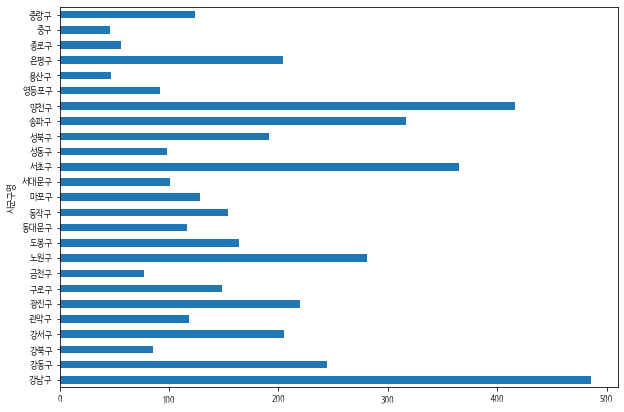

In [61]:
g.loc['학원-입시'].plot.barh(figsize=(10,7))

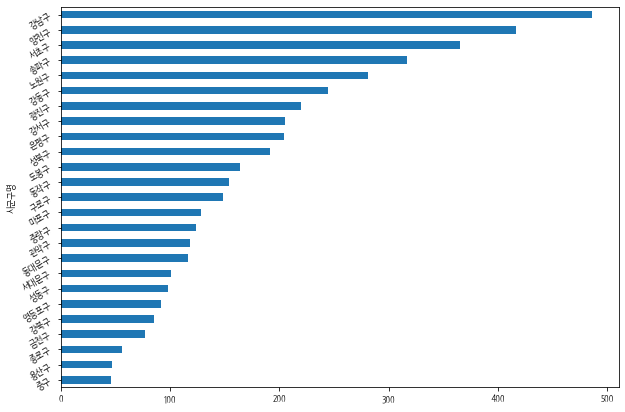

In [62]:
g.loc['학원-입시'].sort_values().plot.barh(figsize=(10,7),rot=30)

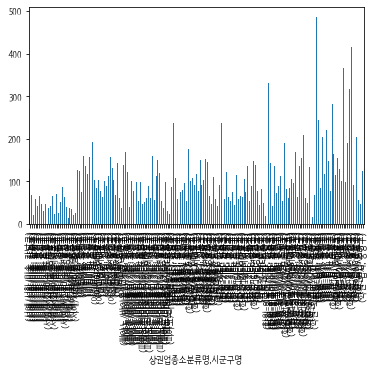

In [63]:
g.plot.bar()

In [64]:
g.index

MultiIndex([('서예/서화/미술',  '강남구'),
            ('서예/서화/미술',  '강동구'),
            ('서예/서화/미술',  '강북구'),
            ('서예/서화/미술',  '강서구'),
            ('서예/서화/미술',  '관악구'),
            ('서예/서화/미술',  '광진구'),
            ('서예/서화/미술',  '구로구'),
            ('서예/서화/미술',  '금천구'),
            ('서예/서화/미술',  '노원구'),
            ('서예/서화/미술',  '도봉구'),
            ...
            (   '학원-입시',  '성동구'),
            (   '학원-입시',  '성북구'),
            (   '학원-입시',  '송파구'),
            (   '학원-입시',  '양천구'),
            (   '학원-입시', '영등포구'),
            (   '학원-입시',  '용산구'),
            (   '학원-입시',  '은평구'),
            (   '학원-입시',  '종로구'),
            (   '학원-입시',   '중구'),
            (   '학원-입시',  '중랑구')],
           names=['상권업종소분류명', '시군구명'], length=175)

In [65]:
g.unstack().T.iloc[-5:,-5:]

상권업종소분류명,피아노/바이올린/기타,학원(종합),학원-기타,학원-외국어/어학,학원-입시
시군구명,,,,,
용산구,37,46,44,49,47
은평구,99,111,83,133,204
종로구,30,59,50,56,56
중구,23,42,19,17,46
중랑구,87,92,58,67,124


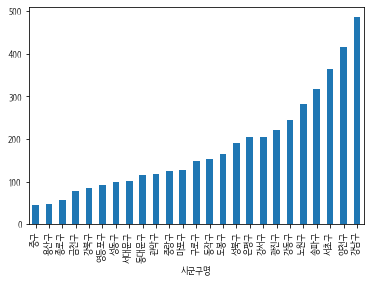

In [66]:
g.unstack().loc['학원-입시'].sort_values().plot.bar()

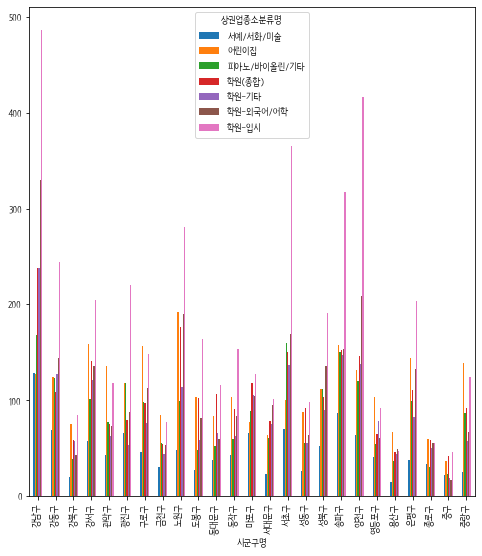

In [67]:
g.unstack().T.plot.bar(figsize =(8,9))

In [68]:
i= g.reset_index()
i = i.rename(columns = {'상호명':'상호수'})
i

,상권업종소분류명,시군구명,상호수
0,서예/서화/미술,강남구,129
1,서예/서화/미술,강동구,69
2,서예/서화/미술,강북구,20
3,서예/서화/미술,강서구,58
4,서예/서화/미술,관악구,43
...,...,...,...
170,학원-입시,용산구,47
171,학원-입시,은평구,204
172,학원-입시,종로구,56
173,학원-입시,중구,46


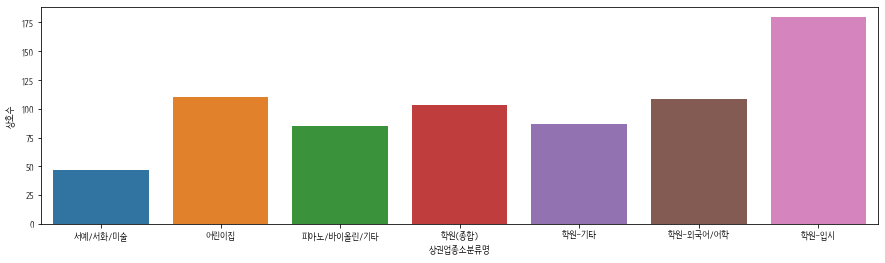

In [69]:
plt.figure(figsize=(15,4))
sns.barplot(data = i,x= '상권업종소분류명',y='상호수',ci=None)

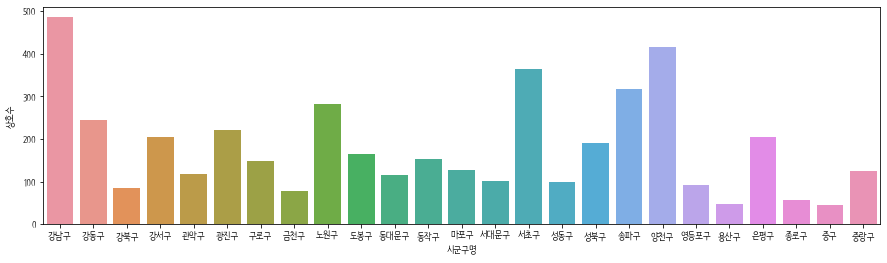

In [70]:
plt.figure(figsize=(15,4))
academy_sub = i[i['상권업종소분류명']=='학원-입시'].copy()
sns.barplot(data = academy_sub,x= '시군구명',y='상호수')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


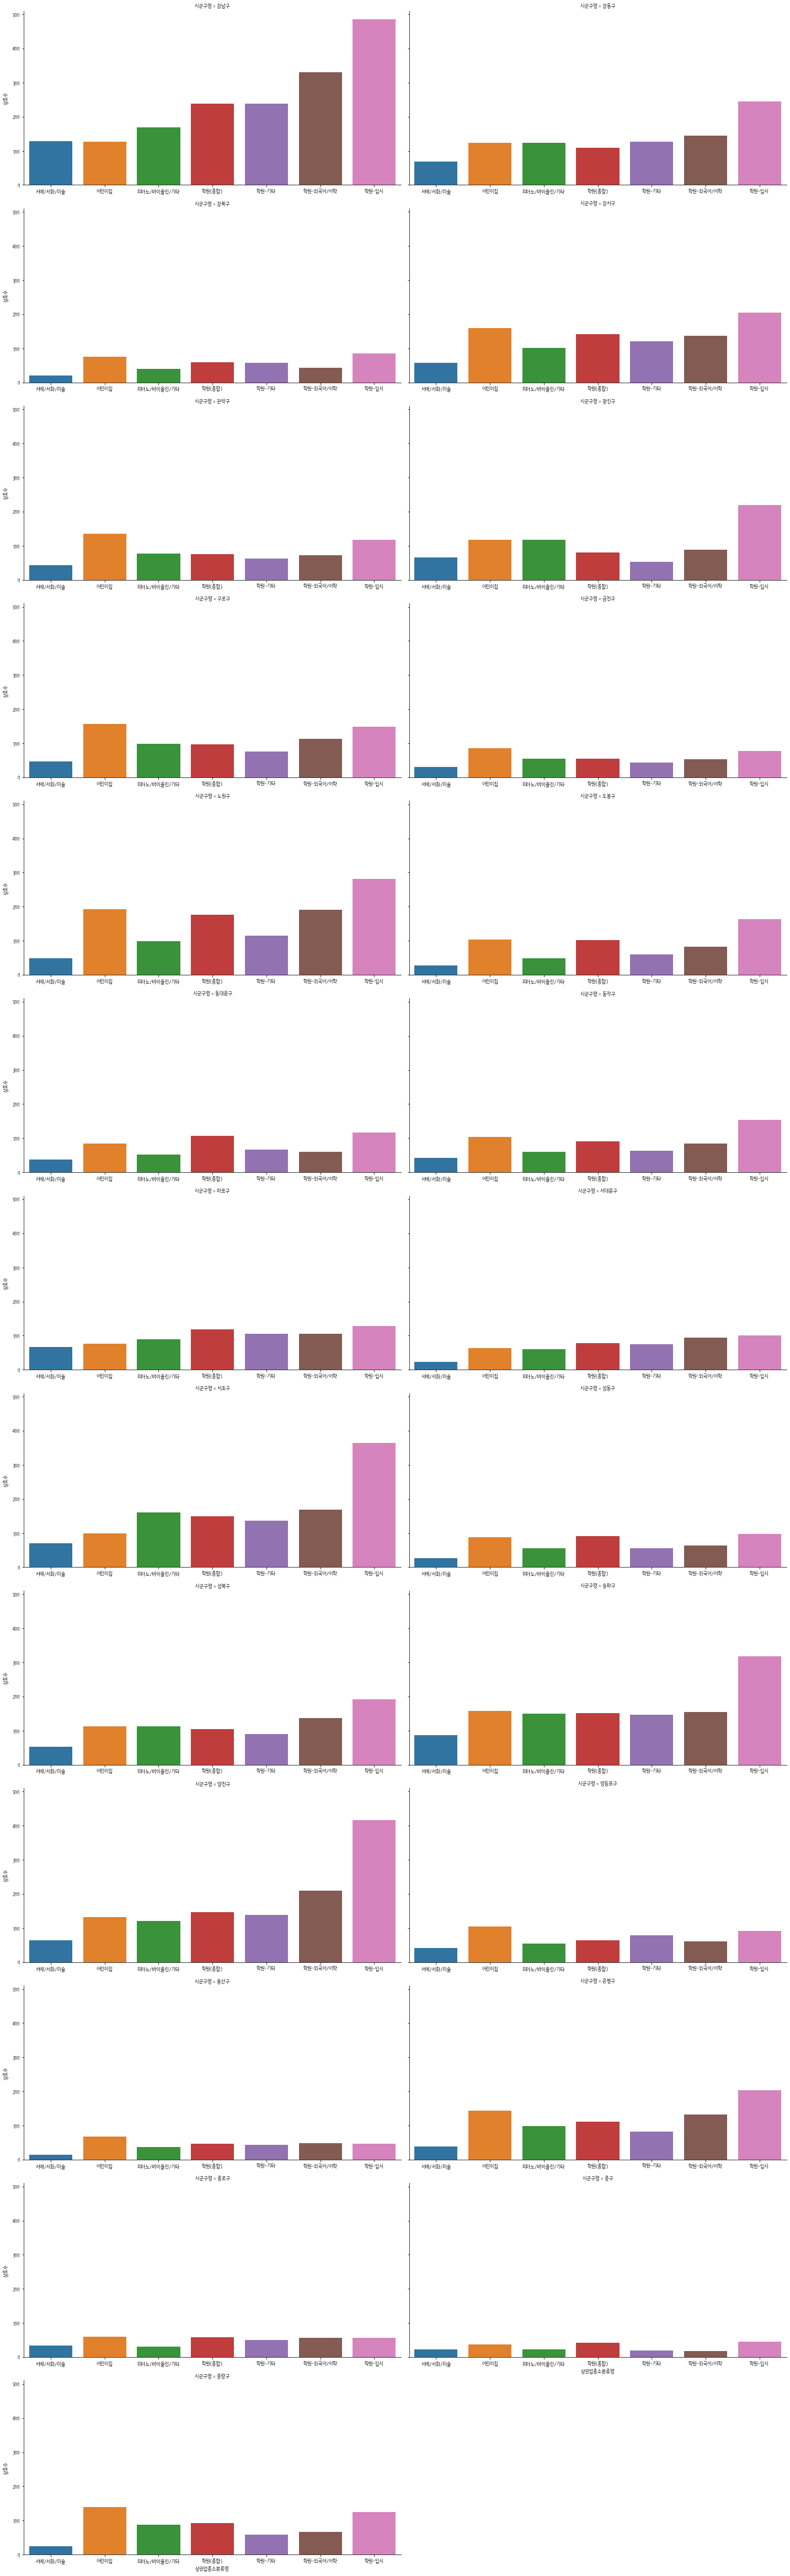

In [77]:

sns.catplot(data=i,x='상권업종소분류명',y='상호수',kind = 'bar',col = '시군구명',ci = None, col_wrap = 2, sharex = False, aspect=2)